In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
from pandas_datareader import data
%matplotlib inline
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [7]:
Internet_list = ['BIDU', 'BABA', 'MSFT', 'GOOG', 'AAPL', 'PDD','TCEHY','AMZN']
# 美交所:百度,阿里巴巴,微软,谷歌,苹果,拼多多,腾讯,亚马逊
Airline_list = ['RTN','DAL','UAL','AAL','BA']
#美交所:雷神，达美航空，联合大陆航空，美国航空，波音

Bank_list = ['600036.ss','601288.ss','601998.ss','600926.ss','000001.sz','002936.SZ']
#Bank_list = ['600926.ss','002936.SZ']
# 沪交所:招商银行，农业银行，中信银行，杭州银行
# 深交所:，
Energy_list =['600089.ss','600131.ss','600152.ss','600192.ss']
#特变电工, 岷江水电，维克精华, 长城电工'600089.ss','600131.ss''600152.ss','600192.ss'
#Energy_list = ['600532.ss','600777.ss','601857.ss','600021.ss','000923.sz']
# 沪交所:宏达矿业，新潮能源，中国石油，上海电力
# 深交所:河北宣工
Medical_list = ['BSPM','HCM']
# 美交所：奥星制药
name_dict = {'BIDU':'Baidu', 'BABA':'AliBaBa', 'MSFT':'Microsoft', 'GOOG':'Google', 'AAPL':'Apple', 'PDD':'Pinduoduo','TCEHY':'Tencent','AMZN':'yamaxun',
             'RTN':'Raythen','DAL':'Delta','UAL':'UAL','AAL':'American Airlines','BA':'Boeing',
             '600036.ss':'Zhaoshang','601288.ss':'Nongye','601998.ss':'Zhonxin','600926.ss':'Hangzhou','000001.sz':'Pingan','002936.SZ':'Zhengzhou',
             '600532.ss':'Hongda','600777.ss':'Xinchao','601857.ss':'Zhonguoshiyou','600021.ss':'Shanghaidianli','000923.sz':'Hebei',
             'BSPM':'Aoxing','HCM':'Hehuang','600089.ss':'Tebian','600131.ss':'Minjiang',
             '600152.ss':'Weike','600192.ss':'Changcheng'
            }

#all_stock = [Internet_list]
#all_stock = [Airline_list]
#all_stock = [Bank_list]
# all_stock = [Energy_list]
# for stock in all_stock:
#     for per in stock:
#         data = pdr.get_data_yahoo(per,start='1/1/2018')
#         print(name_dict[per])
#         data.to_csv('./mydata/' +name_dict[per]+ '.csv')


#  <center>internet</center>

In [52]:
all_stock = [Internet_list]
stocks = dict()
for stock in all_stock:
    for per in stock:
        data = pd.read_csv("./mydata/" + name_dict[per] + '.csv', index_col = 'Date')
        #data.index = pd.to_datetime(data.index)
        stocks[per] = data

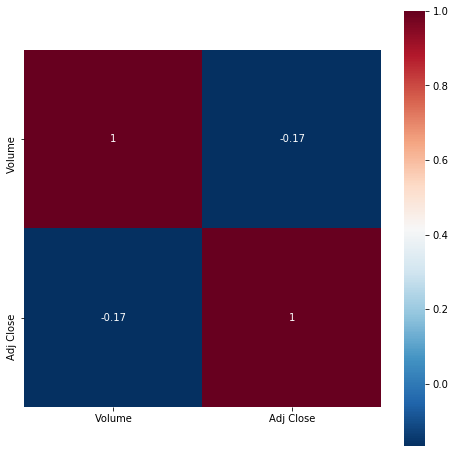

In [46]:
df = stocks['BABA']
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df[['Volume', 'Adj Close']].corr(), annot=True, square=True, cmap="RdBu_r")
#plt.savefig('./pic/6.jpg')

In [53]:
volume = pd.DataFrame({tic: data['Volume'] for tic,data in stocks.items()})
high = pd.DataFrame({tic:data['High'] for tic, data in stocks.items()})
low = pd.DataFrame({tic:data['Low'] for tic, data in stocks.items()})
open = pd.DataFrame({tic:data['Open'] for tic, data in stocks.items()})
price = pd.DataFrame({tic:data['Adj Close'] for tic, data in stocks.items()})

In [54]:
volume.head

<bound method NDFrame.head of                BIDU      BABA        MSFT     GOOG        AAPL         PDD  \
2018-01-02  2690400  29916900  22483800.0  1237600  25555900.0         NaN   
2018-01-03  1906200  20121900  26061400.0  1430200  29517900.0         NaN   
2018-01-04  1575700  19473800  21912000.0  1004600  22434600.0         NaN   
2018-01-05  2604000  18168300  23407100.0  1279100  23660000.0         NaN   
2018-01-08  2416900  16230100  22113000.0  1047600  20567800.0         NaN   
...             ...       ...         ...      ...         ...         ...   
2020-04-01  3805000  17948600  57969900.0  2344200  44054600.0   9897000.0   
2020-04-02  2442000  13412100  49630700.0  1964900  41483500.0   7576200.0   
2020-04-03  2239700   9483100  41243300.0  2313400  32470000.0   7498000.0   
2020-04-06  3587600  13236400  67021300.0  2660700  50289700.0   7967800.0   
2020-04-07  6968627  14031484  62769038.0  2387329  50721831.0  10867586.0   

                TCEHY     AMZN  


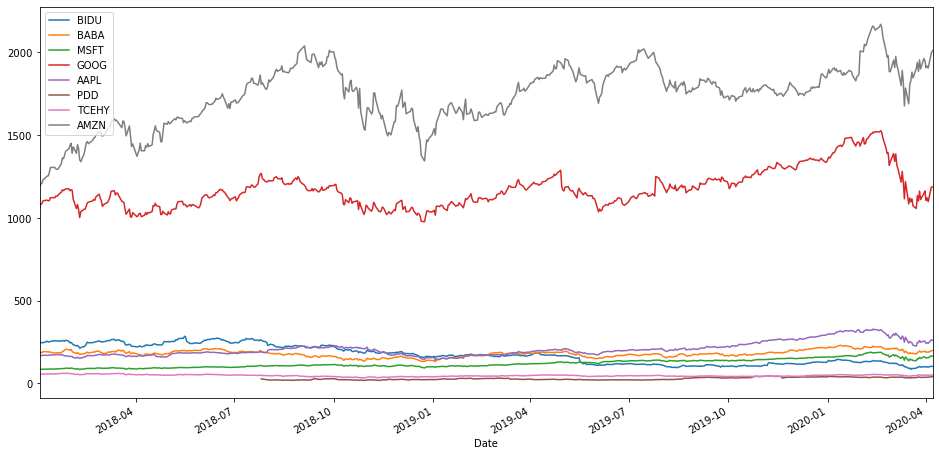

In [11]:
price.plot(figsize = (16,8))
plt.savefig('./pic/3.jpg')

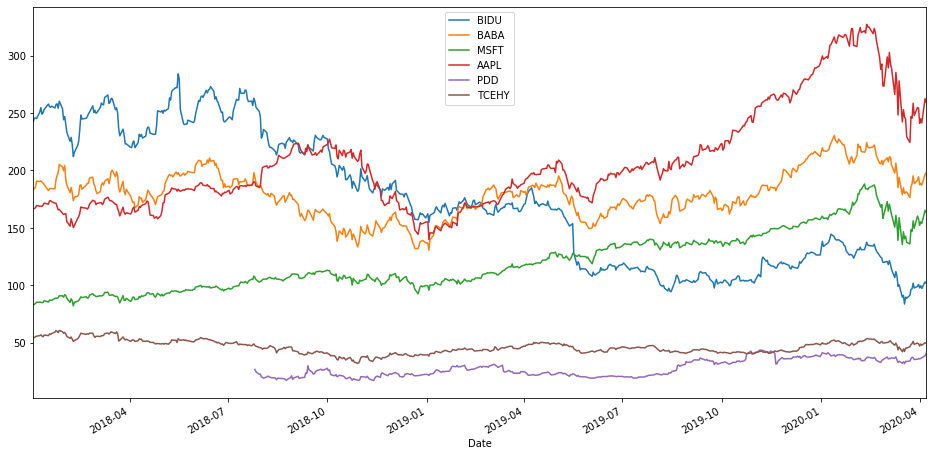

In [38]:
price[['BIDU','BABA','MSFT','AAPL','PDD','TCEHY']].plot(figsize = (16,8))

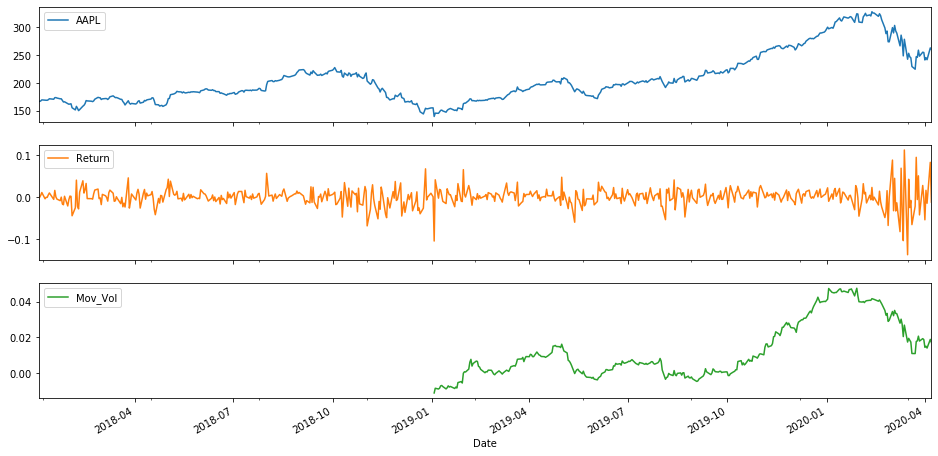

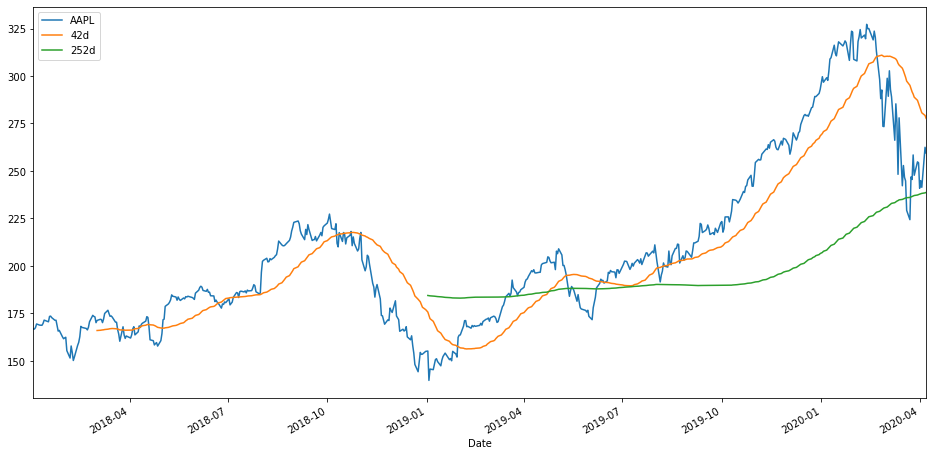

In [71]:
df = pd.DataFrame(price['AAPL'], index = price.index)
df['Return'] = np.log(df['AAPL']/df['AAPL'].shift(1))
df['42d'] = df['AAPL'].rolling(window = 42,center = False).mean()
df['252d'] = df['AAPL'].rolling(window = 252, center = False).mean()
df['Mov_Vol'] = df['Return'].rolling(window = 252, center = False).mean()*math.sqrt(252)
df[['AAPL','Return','Mov_Vol']].plot(subplots = True, figsize = (16,8))
df[['AAPL','42d','252d']].plot(figsize = (16,8))

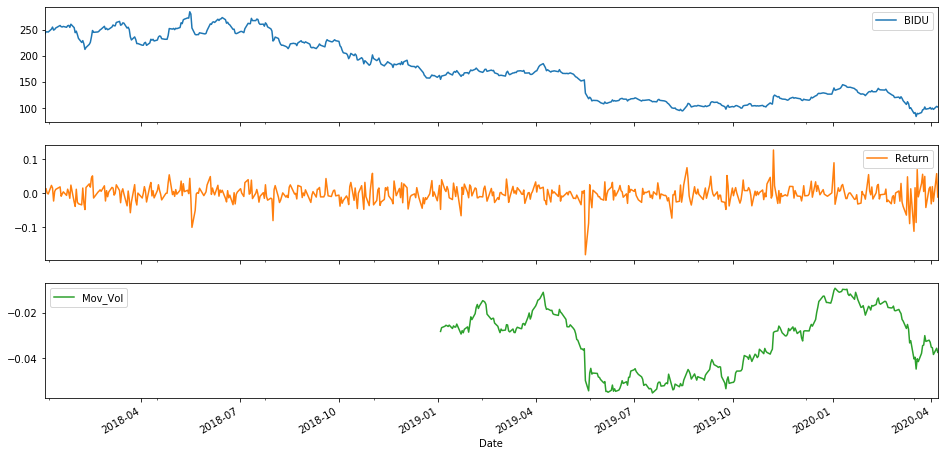

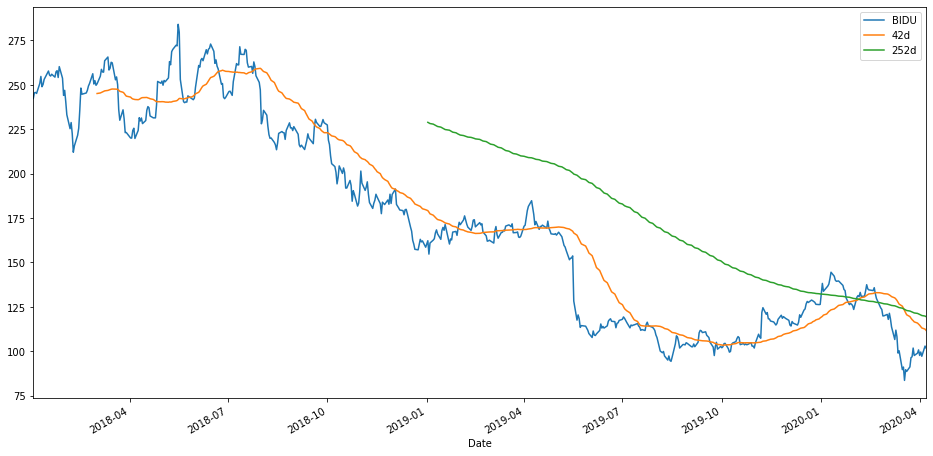

In [31]:
df = pd.DataFrame(price['BIDU'], index = price.index)
df['Return'] = np.log(df['BIDU']/df['BIDU'].shift(1))
df['42d'] = df['BIDU'].rolling(window = 42,center = False).mean()
df['252d'] = df['BIDU'].rolling(window = 252, center = False).mean()
df['Mov_Vol'] = df['Return'].rolling(window = 252, center = False).mean()*math.sqrt(252)
df[['BIDU','Return','Mov_Vol']].plot(subplots = True, figsize = (16,8))
plt.savefig('./pic/1.2/9.jpg')
df[['BIDU','42d','252d']].plot(figsize = (16,8))

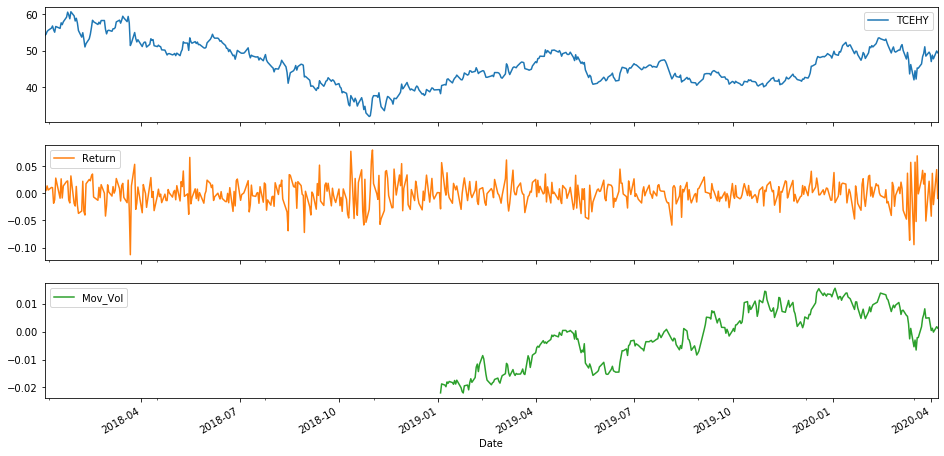

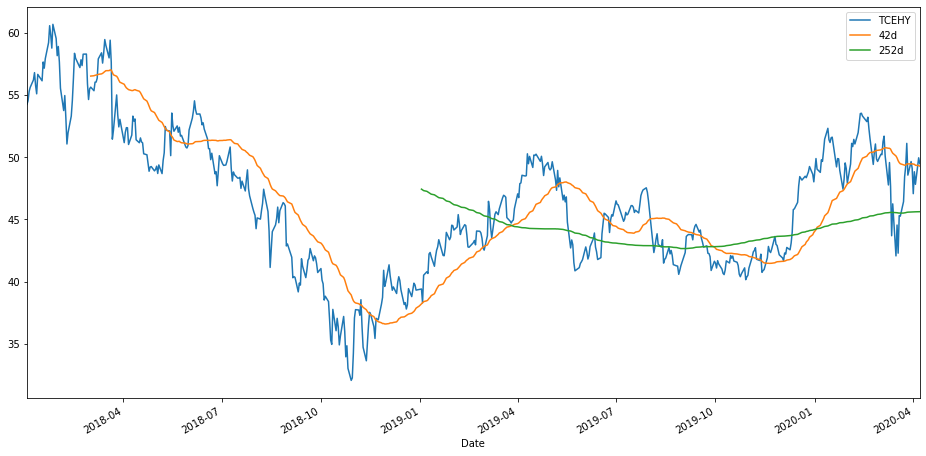

In [74]:
df = pd.DataFrame(price['TCEHY'], index = price.index)
df['Return'] = np.log(df['TCEHY']/df['TCEHY'].shift(1))
df['42d'] = df['TCEHY'].rolling(window = 42,center = False).mean()
df['252d'] = df['TCEHY'].rolling(window = 252, center = False).mean()
df['Mov_Vol'] = df['Return'].rolling(window = 252, center = False).mean()*math.sqrt(252)
df[['TCEHY','Return','Mov_Vol']].plot(subplots = True, figsize = (16,8))
df[['TCEHY','42d','252d']].plot(figsize = (16,8))

In [ ]:
price.corr()

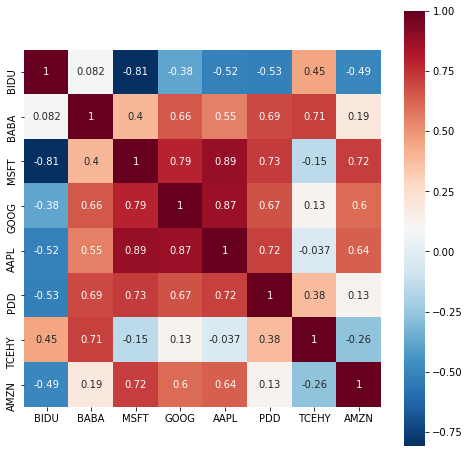

In [29]:
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(price.corr(), annot=True, square=True, cmap="RdBu_r")
plt.savefig('./pic/1.2/7.jpg')

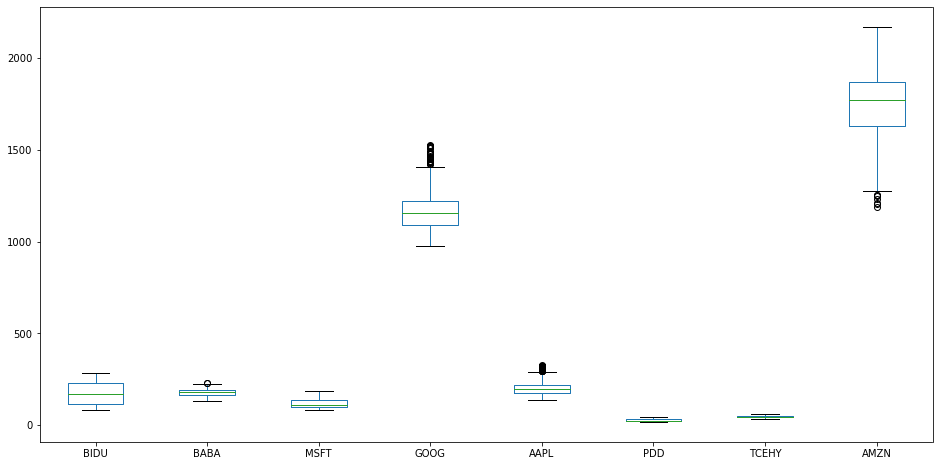

In [12]:
price.plot.box(figsize = (16,8))
plt.savefig('./pic/1.2/4.jpg')

In [97]:
price.describe()

,BIDU,BABA,MSFT,GOOG,AAPL,PDD,TCEHY,AMZN
count,570.000000,570.000000,570.000000,570.000000,570.000000,428.000000,570.000000,570.000000
mean,173.519755,179.272404,119.735883,1173.201454,206.737909,27.737874,46.247213,1741.593701
std,56.816894,19.990360,24.875017,112.370002,43.359674,7.327749,5.643444,181.422857
min,83.620003,130.600006,82.121544,976.219971,139.753540,17.150000,32.059837,1189.010010
25%,116.790001,166.377506,100.134264,1091.304993,173.431591,21.212500,42.060428,1628.132538
50%,168.084999,178.970001,110.913696,1155.930054,197.096191,25.130000,45.635849,1769.039978
75%,227.217495,190.487499,137.239510,1220.987488,220.926579,34.647499,50.060491,1870.314972
max,284.070007,230.479996,188.185989,1526.689941,327.200012,43.529999,60.662487,2170.219971


In [109]:
# f, ax = plt.subplots(figsize=(8, 8))
#sns.barplot(data = price.describe().loc['mean'])
price.describe().loc['mean']

BIDU      173.519755
BABA      179.272404
MSFT      119.735883
GOOG     1173.201454
AAPL      206.737909
PDD        27.737874
TCEHY      46.247213
AMZN     1741.593701
Name: mean, dtype: float64

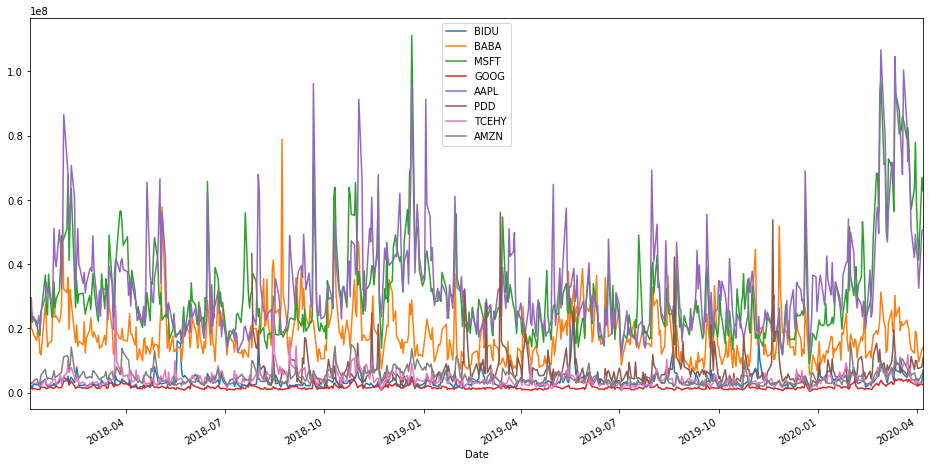

In [14]:
volume.plot(figsize = (16,8))
plt.savefig('./pic/1.2/5.jpg')

### 能源类

In [8]:
all_stock = [Energy_list]
stocks = dict()
for stock in all_stock:
    for per in stock:
        data = pd.read_csv("./mydata/" + name_dict[per] + '.csv', index_col = 'Date')
        data.index = pd.to_datetime(data.index)
        stocks[per] = data

In [9]:
volume = pd.DataFrame({tic: data['Volume'] for tic,data in stocks.items()})
high = pd.DataFrame({tic:data['High'] for tic, data in stocks.items()})
low = pd.DataFrame({tic:data['Low'] for tic, data in stocks.items()})
open = pd.DataFrame({tic:data['Open'] for tic, data in stocks.items()})
price = pd.DataFrame({tic:data['Adj Close'] for tic, data in stocks.items()})

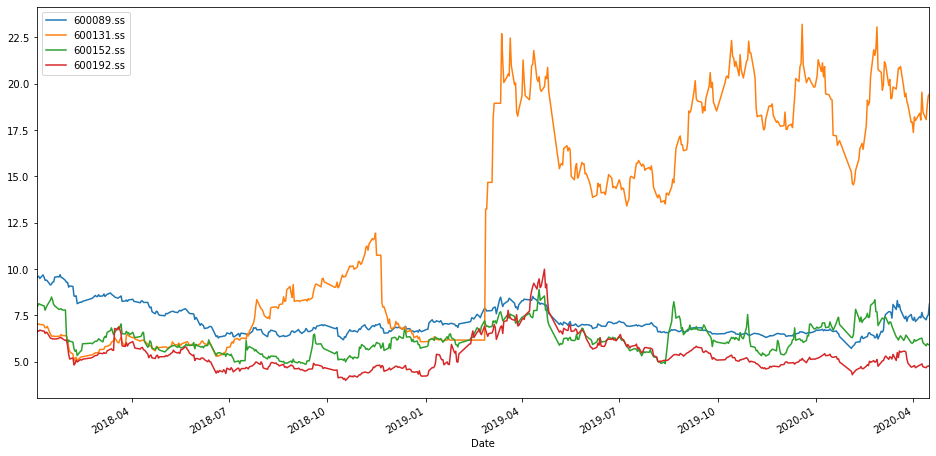

In [10]:
price.plot(figsize = (16,8))
plt.savefig('./pic/1.2/17.jpg')

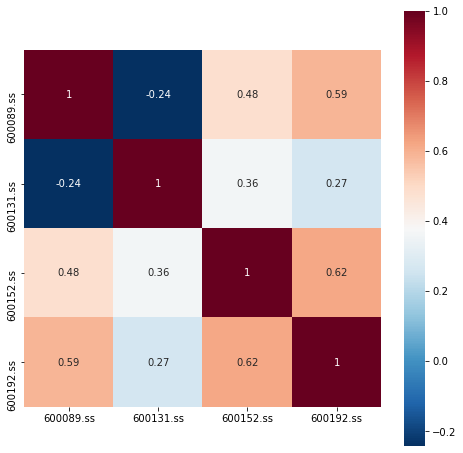

In [11]:
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(price.corr(), annot=True, square=True, cmap="RdBu_r")
plt.savefig('./pic/1.2/18.jpg')

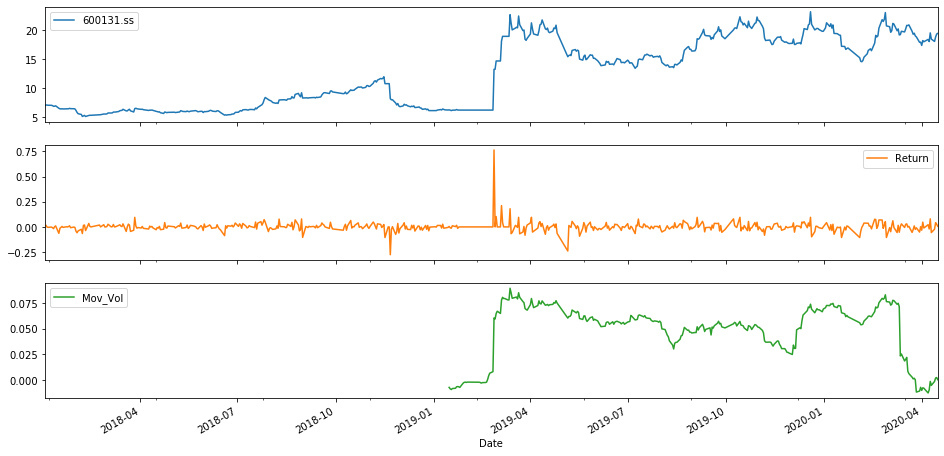

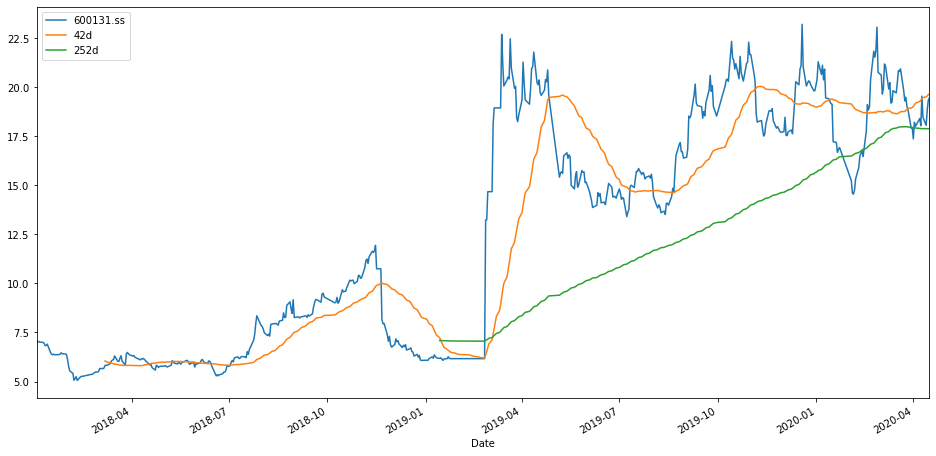

In [12]:
df = pd.DataFrame(price['600131.ss'], index = price.index)
df['Return'] = np.log(df['600131.ss']/df['600131.ss'].shift(1))
df['42d'] = df['600131.ss'].rolling(window = 42,center = False).mean()
df['252d'] = df['600131.ss'].rolling(window = 252, center = False).mean()
df['Mov_Vol'] = df['Return'].rolling(window = 252, center = False).mean()*math.sqrt(252)
df[['600131.ss','Return','Mov_Vol']].plot(subplots = True, figsize = (16,8))
plt.savefig('./pic/1.2/19.jpg')
df[['600131.ss','42d','252d']].plot(figsize = (16,8))
plt.savefig('./pic/1.2/20.jpg')

In [40]:
all_stock = [Medical_list]
stocks = dict()
for stock in all_stock:
    for per in stock:
        data = pd.read_csv("./mydata/" + name_dict[per] + '.csv', index_col = 'Date')
        data.index = pd.to_datetime(data.index)
        stocks[per] = data
volume = pd.DataFrame({tic: data['Volume'] for tic,data in stocks.items()})
high = pd.DataFrame({tic:data['High'] for tic, data in stocks.items()})
low = pd.DataFrame({tic:data['Low'] for tic, data in stocks.items()})
open = pd.DataFrame({tic:data['Open'] for tic, data in stocks.items()})
price = pd.DataFrame({tic:data['Adj Close'] for tic, data in stocks.items()})

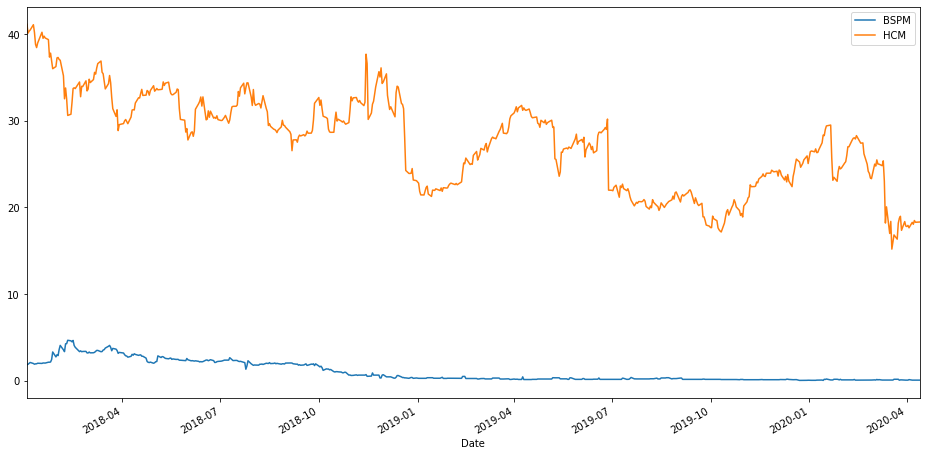

In [41]:
price.plot(figsize = (16,8))
plt.savefig('./pic/1.2/12.jpg')

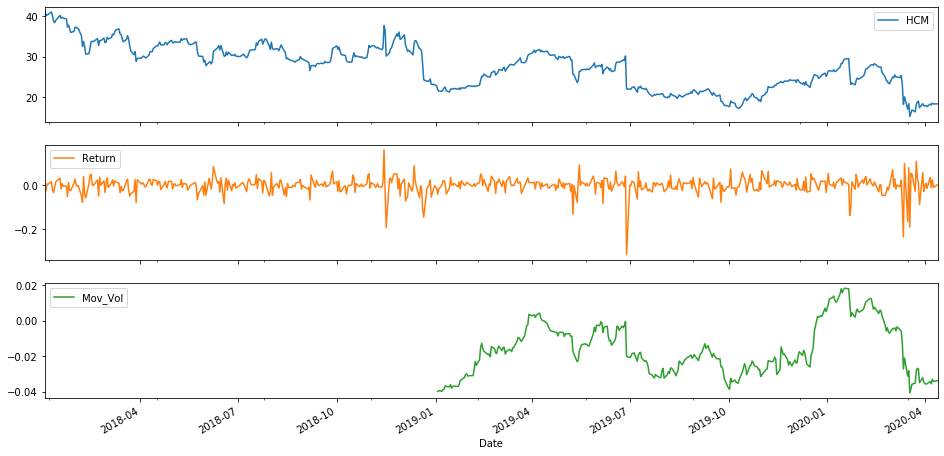

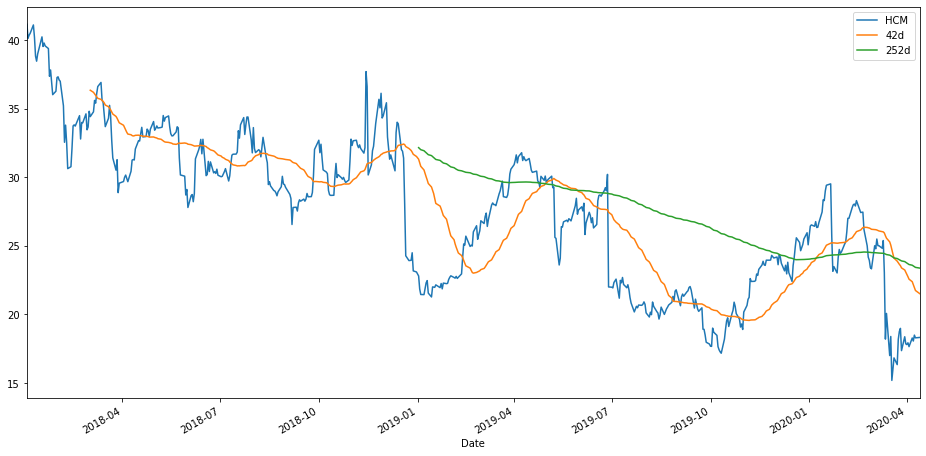

In [44]:
df = pd.DataFrame(price['HCM'], index = price.index)
df['Return'] = np.log(df['HCM']/df['HCM'].shift(1))
df['42d'] = df['HCM'].rolling(window = 42,center = False).mean()
df['252d'] = df['HCM'].rolling(window = 252, center = False).mean()
df['Mov_Vol'] = df['Return'].rolling(window = 252, center = False).mean()*math.sqrt(252)
df[['HCM','Return','Mov_Vol']].plot(subplots = True, figsize = (16,8))
plt.savefig('./pic/1.2/14.jpg')
df[['HCM','42d','252d']].plot(figsize = (16,8))
plt.savefig('./pic/1.2/13.jpg')